## Import libraries ##

In [1]:
# importing the required libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#reading the csv file from drive
import pandas as pd
bread = pd.read_csv('Bakery_Dataset.csv')

## Data Information ##

In [3]:
#displaying the initial data
bread.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [4]:
#display data summary
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


***
## Check if any values missing ##

In [5]:
# check for missing values
bread.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [6]:
missing_value = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0]
print("There are {0} missing values in the dataframe.".format(len(bread[bread.Item.isin(missing_value)])))
bread[bread.Item.isin(missing_value)].head(10)

There are 786 missing values in the dataframe.


,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
85,2016-10-30,11:55:51,40,NONE
126,2016-10-30,13:02:04,59,NONE
140,2016-10-30,13:37:25,65,NONE
149,2016-10-30,13:46:48,67,NONE
167,2016-10-30,14:32:26,75,NONE


In [7]:
bread = bread.drop(bread[bread.Item == "NONE"].index)
bread = bread[bread.Transaction>0]
print("Number of rows: {0}".format(len(bread)))
bread.head(10)

Number of rows: 20507


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


***
## Merge Data and Time to DatetimeIndex ##

In [8]:
bread['Datetime'] = pd.to_datetime(bread['Date']+' '+bread['Time'])
bread = bread[["Datetime", "Transaction", "Item"]].set_index("Datetime")
bread.head(10)

,Transaction,Item
Datetime,,
2016-10-30 09:58:11,1,Bread
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:07:57,3,Hot chocolate
2016-10-30 10:07:57,3,Jam
2016-10-30 10:07:57,3,Cookies
2016-10-30 10:08:41,4,Muffin
2016-10-30 10:13:03,5,Coffee
2016-10-30 10:13:03,5,Pastry


In [9]:
#description of the dataset
Ser = bread.groupby('Transaction').nunique()
Ser.describe()

,Item
count,9465.000000
mean,1.995457
std,1.129543
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,10.000000


### Brief summary of the data ###

In [10]:
total_items = len(bread)
total_days = len(np.unique(bread.index.date))
total_months = len(np.unique(bread.index.month))
average_items = total_items / total_days
unique_items = bread.Item.unique().size

print("Bakery sells {} unique items ".format(unique_items))
print("Total {} items sold in {} days within {} months".format(total_items, total_days, total_months))
print("About an average of {} items are sold daily".format(average_items))


Bakery sells 94 unique items 
Total 20507 items sold in 159 days within 7 months
About an average of 128.9748427672956 items are sold daily


***
## Performing encoding of the data(One-hot encoding) ##

In [11]:
df = bread.groupby(["Transaction","Item"]).size().reset_index(name="Count")
df.head()

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1


In [12]:
basket = (df.groupby(['Transaction', 'Item'])['Count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
basket[basket.Coffee == 4].iloc[:,14:28]

Item,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes
Transaction,,,,,,,,,,,,,,
6560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
6850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
6887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [14]:
# the encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


In [15]:
basket_sets = basket.applymap(encode_units)
basket_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
basket_sets[basket_sets.Coffee == 1].iloc[3142:3145,14:28]

Item,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes
Transaction,,,,,,,,,,,,,,
6884,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6885,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6887,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
print(basket_sets.count())

Item
Adjustment                  9465
Afternoon with the baker    9465
Alfajores                   9465
Argentina Night             9465
Art Tray                    9465
                            ... 
Tshirt                      9465
Valentine's card            9465
Vegan Feast                 9465
Vegan mincepie              9465
Victorian Sponge            9465
Length: 94, dtype: int64


# Dataset Generation and Analysis

In [34]:
import numpy as np

# Load the dataset
data = basket_sets

# Calculate the number of transactions in each dataset
n = len(data)
n_per_dataset = n // 282

transactions1 = []
transactions2 = []
transactions3 = []
transactions4 = []
transactions5 = []
dataset1 = data[n_per_dataset*4:n_per_dataset*9]
dataset3 = data[n_per_dataset*15:n_per_dataset*20]
dataset2 = data[n_per_dataset*7:n_per_dataset*12] 
dataset4 = data[n_per_dataset*265:n_per_dataset*270]
dataset5 = data[n_per_dataset*200:n_per_dataset*205]

for i in range(len(dataset1)):
    transactions1.append([item for item in dataset1.columns if dataset1.iloc[i][item] == 1])
unique_items = set([item for transaction in transactions1 for item in transaction])
num_unique_items1 = len(unique_items)
print("Number of unique item for 1st dataset:", num_unique_items1)

for i in range(len(dataset2)):
    transactions2.append([item for item in dataset2.columns if dataset2.iloc[i][item] == 1])
unique_items = set([item for transaction in transactions2 for item in transaction])
num_unique_items2 = len(unique_items)
print("Number of unique item for 2nd dataset:", num_unique_items2)

for i in range(len(dataset3)):
    transactions3.append([item for item in dataset3.columns if dataset3.iloc[i][item] == 1])
unique_items = set([item for transaction in transactions3 for item in transaction])
num_unique_items3 = len(unique_items)
print("Number of unique item for 3rd dataset:", num_unique_items3)

for i in range(len(dataset4)):
    transactions4.append([item for item in dataset4.columns if dataset4.iloc[i][item] == 1])
unique_items = set([item for transaction in transactions4 for item in transaction])
num_unique_items4 = len(unique_items)
print("Number of unique item for 4th dataset:", num_unique_items4)

for i in range(len(dataset5)):
    transactions5.append([item for item in dataset5.columns if dataset5.iloc[i][item] == 1])
unique_items = set([item for transaction in transactions5 for item in transaction])
num_unique_items5 = len(unique_items)
print("Number of unique item for 5th dataset:", num_unique_items5)

Number of unique item for 1st dataset: 27
Number of unique item for 2nd dataset: 28
Number of unique item for 3rd dataset: 33
Number of unique item for 4th dataset: 35
Number of unique item for 5th dataset: 38


***
# Displaying the frequent itemsets ##


In [35]:
import time

#1st dataset unique item generation
start_time = time.time()
frequent_itemsets1 = apriori(dataset1, min_support=0.01, use_colnames=True)
end_time = time.time()
time_taken1 = end_time - start_time
print(f"Time taken to generate itemset for 1st dataset: {end_time - start_time}")

#2nd dataset unique item generation
start_time = time.time()
frequent_itemsets2 = apriori(dataset2, min_support=0.01, use_colnames=True)
end_time = time.time()
time_taken2 = end_time - start_time
print(f"Time taken to generate itemset for 2nd dataset: {end_time - start_time}")

#3rd dataset unique item generation
start_time = time.time()
frequent_itemsets3 = apriori(dataset3, min_support=0.01, use_colnames=True)
end_time = time.time()
time_taken3 = end_time - start_time
print(f"Time taken to generate itemset for 3rd dataset: {end_time - start_time}")

#4th dataset unique item generation
start_time = time.time()
frequent_itemsets4 = apriori(dataset4, min_support=0.01, use_colnames=True)
end_time = time.time()
time_taken4 = end_time - start_time
print(f"Time taken to generate itemset for 4th dataset: {end_time - start_time}")

#5th dataset unique item generation
start_time = time.time()
frequent_itemsets5 = apriori(dataset5, min_support=0.01, use_colnames=True)
end_time = time.time()
time_taken5 = end_time - start_time
print(f"Time taken to generate itemset for 5th dataset: {end_time - start_time}")

Time taken to generate itemset for 1st dataset: 0.010359525680541992
Time taken to generate itemset for 2nd dataset: 0.013317346572875977
Time taken to generate itemset for 3rd dataset: 0.016388893127441406
Time taken to generate itemset for 4th dataset: 0.01724863052368164
Time taken to generate itemset for 5th dataset: 0.023478984832763672


In [36]:
# Calculate the number of items in each transaction by summing the binary columns
item_counts1 = dataset1.iloc[:, 1:].sum(axis=1)
item_counts2 = dataset2.iloc[:, 1:].sum(axis=1)
item_counts3 = dataset3.iloc[:, 1:].sum(axis=1)
item_counts4 = dataset4.iloc[:, 1:].sum(axis=1)
item_counts5 = dataset5.iloc[:, 1:].sum(axis=1)
# Calculate the average number of items per transaction
avg_items_per_transaction1 = item_counts1.mean()
avg_items_per_transaction2 = item_counts2.mean()
avg_items_per_transaction3 = item_counts3.mean()
avg_items_per_transaction4 = item_counts4.mean()
avg_items_per_transaction5 = item_counts5.mean()
print(f"Average number of items per transaction for dataset1: {avg_items_per_transaction1:.2f}")
print(f"Average number of items per transaction for dataset2: {avg_items_per_transaction2:.2f}")
print(f"Average number of items per transaction for dataset3: {avg_items_per_transaction3:.2f}")
print(f"Average number of items per transaction for dataset4: {avg_items_per_transaction4:.2f}")
print(f"Average number of items per transaction for dataset5: {avg_items_per_transaction5:.2f}")

Average number of items per transaction for dataset1: 1.87
Average number of items per transaction for dataset2: 1.93
Average number of items per transaction for dataset3: 2.19
Average number of items per transaction for dataset4: 2.05
Average number of items per transaction for dataset5: 2.38


In [37]:
M = 165
w = [avg_items_per_transaction2,avg_items_per_transaction3,avg_items_per_transaction4,avg_items_per_transaction5]
n = [num_unique_items2,num_unique_items3,num_unique_items4,num_unique_items5]
time_brute_force = []

t0 = time_taken1
w0 = avg_items_per_transaction1
n0 = num_unique_items1

time_brute_force.append(t0)

C = t0/(w0*n0)
print(C)

for i,j in zip(w,n):
    t=C*i*j*M
    time_brute_force.append(t)
print(time_brute_force)

0.00020554614445519826
[0.010359525680541992, 1.8301828702290852, 2.448671218894777, 2.4388050039609275, 3.0618153678046336]


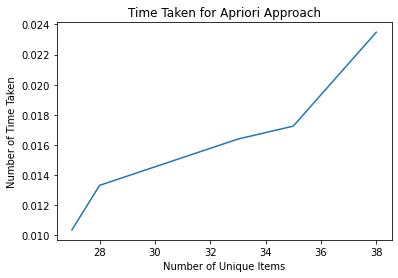

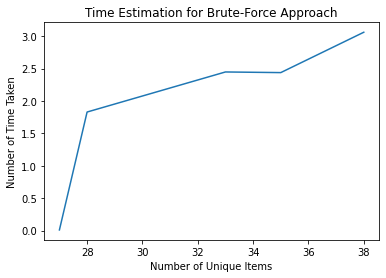

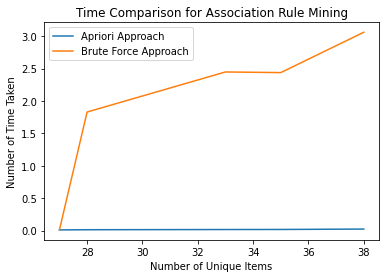

In [38]:
import matplotlib.pyplot as plt

x = [num_unique_items1, num_unique_items2, num_unique_items3, num_unique_items4, num_unique_items5]
y = [time_taken1, time_taken2, time_taken3, time_taken4, time_taken5]

plt.plot(x, y)
plt.xlabel('Number of Unique Items')
plt.ylabel('Number of Time Taken')
plt.title('Time Taken for Apriori Approach')
plt.show()

plt.plot(x, time_brute_force)
plt.xlabel('Number of Unique Items')
plt.ylabel('Number of Time Taken')
plt.title('Time Estimation for Brute-Force Approach')
plt.show()

plt.plot(x, y, label="Apriori Approach")
plt.plot(x, time_brute_force, label="Brute Force Approach")
plt.xlabel('Number of Unique Items')
plt.ylabel('Number of Time Taken')
plt.title('Time Comparison for Association Rule Mining')
plt.legend(loc="upper left")
plt.show()